### SUMMARY 2:

The AutoReg model performs well with low MAE (1.93), MSE (6.09), and RMSE (2.47), indicating relatively accurate predictions. It explains 63% of the variance (R²), making it a strong model for this time-series data.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit MA model on Temp data (AR=0, I=0, MA=2)
model_ma = ARIMA(data['Temp'], order=(0, 0, 2)).fit()

# Get predictions
data['MA_Pred'] = model_ma.fittedvalues

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['MA_Pred'], label='MA Prediction', linestyle='dashed')
plt.title('Temperature - MA Model')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MA Model Predictions (in-sample)
y_true = data['Temp']
y_pred = data['MA_Pred']

# Ensure no NaN values
mask = ~y_pred.isna()

# Apply mask for valid data
mae = mean_absolute_error(y_true[mask], y_pred[mask])
mse = mean_squared_error(y_true[mask], y_pred[mask])
rmse = np.sqrt(mse)
r2 = r2_score(y_true[mask], y_pred[mask])

# Print Evaluation metrics
print("MA Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MA Model Evaluation:
MAE: 2.23
MSE: 7.99
RMSE: 2.83
R²: 0.52


### **SUMMARY 3:**


The MA model has slightly higher error metrics (MAE: 2.23, MSE: 7.99, RMSE: 2.83) and explains 52% of the variance (R²), showing it is less accurate and less effective than AutoReg, but still a decent model.

# **RESULT:**


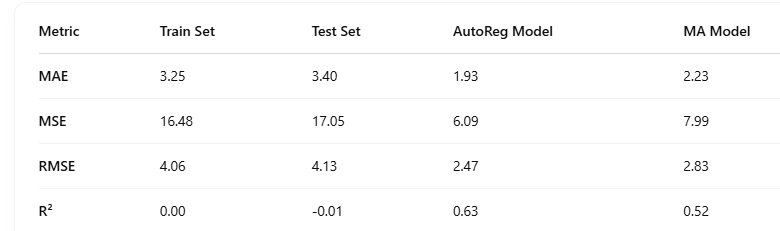

The **AutoReg** model outperforms all others with the **lowest error metrics** and **highest R² (0.63)**, indicating it effectively captures the patterns in the data. The **MA** model follows, with decent performance and a **R² of 0.52**, though its errors are higher than AutoReg. The **Linear Regression** model struggles significantly, with **high error metrics** and a **R² of 0.00**, showing poor predictive power. The **AR model** also doesn't perform well, with a **negative R²** and higher errors compared to AutoReg. Overall, AutoReg is the most reliable model for this dataset.